# Apprentissage supervisé

## Intro

![Alt text](ML.png)

Machine learning = Modèle à partir de données issues de l'expérience
3 techniques
1. Apprentissage supervisé
1. Apprentissage non supervisé
1. Apprentissage par renforcement (robotique, friandise chien)

## Supervisé

### Notes issues de la vidéo 3 de "Initiation au Machine Learning"
Voir : https://youtu.be/K9z0OD22My4?si=KNAU-Ry6NBTSZ7VF

4 étapes : 
1. Importer un Dataset (X, y)
    * y : Target
    * X : Features
    * On note 𝒎 le nombre d’exemples que contient le tableau (le nombre de lignes) 
    * On note 𝒏 le nombre de features (le nombre de colonnes de 𝑋).
    * On note $x^{(i)}$ et $y^{(i)}$ la feature $x$ et la valeur $y$ de $i^{eme}$ échantillon
1. Développer un Modèle
    * Ses paramètres
    * $\theta$ le vecteur des paramètres
    * En régression linéaire, $y=f(X)$ devient en notation matricielle $F(X)=X * \theta$
1. Etablir la fonction coût $J(\theta)$
1. Algorithme de minimisation de la fonction coût



### Intro
Les données sont caractérisées par des features $x_i$ (variables: hauteur, largeur...)

Les données sont annotées par un label/target y (une autre variable : une pomme, une poire...)

L'objectif : prédire y en fonction des $x_i$ qu'on va lui donner

1. On commence par alimenter la machine en données. C'est un dataset
1. On spécifie le type de modèle à utiliser : linéaire, polynomial, arbre, réseau de neurones. On précise aussi les paramètres du modèle (hyperparamètres)
1. Phase d'entrainement : Le soft utilise un algo d'optimisation pour minimiser les erreurs, minimiser la fonction coût. Il détermine les valeurs optimales des paramètres du modèle
1. On peut alors utiliser le modèle pour faire des prédictions

Donc :
1. Dataset
1. Modèle et ses paramètres
1. Entrainement (minimiser la fonction coût)
1. Prédictions


Avec l'apprentissage supervisé on peut résoudre des problèmes : 
1. de régression avec des valeurs de y continues (1.8, 42...)
1. de classification avec des valeurs de y qui sont discètes (pomme, poire, spam...)

## scikit-learn
* Les algos de machine learning sont déjà dans scikit-learn
* Ont tous la même architecture

Pour faire un modèle
1. On instancie un **estimateur** et on lui passe les hyperparamètres
1. Ensuite on entraine, évalue et utilise le modèle avec toujours les 3 mêmes méthodes

```python
model = LinearRegression()
model.fit(X, y)       # entraiement
model.score(X, y)     # évaluation
model.predict(X, y)   # utilisation


model = DecisionTreeClassifier()
model.fit(X, y)
model.score(X, y)
model.predict(X, y)
```

X et y sont 2 tableaux numpy. Ils ont 2 dimensions :
* X : [n_samples, n_features]
* y : [n_samples, n_target=1] ⚡Faut penser à vérifier les dimensions
 
Les modèles sont dans le user guide : https://scikit-learn.org/stable/user_guide.html#user-guide

Il faut importer les modules correspondant et **PAS** sklearn

```python
from sklearn import linear_model
from sklearn.kernel_ridge import KernelRidge
...
```


La carte pour trouver le bon estimateur : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

![Alt text](sklearn.png)

## Régression

In [56]:
import numpy as np
import matplotlib.pyplot as plt

In [62]:
# 1 - Dataset

np.random.seed(0)
m = 100                                  # 100 samples
X = np.linspace(0, 10, m).reshape(m, 1)  # Vérifier les dimensions des matrices. 2 dim
print(type(X), X.ndim, X.shape, )
y = X + np.random.randn(m, 1)            # Vérifier les dimensions des matrices. 2 dim 
print(type(y), y.ndim, y.shape)

<class 'numpy.ndarray'> 2 (100, 1)
<class 'numpy.ndarray'> 2 (100, 1)


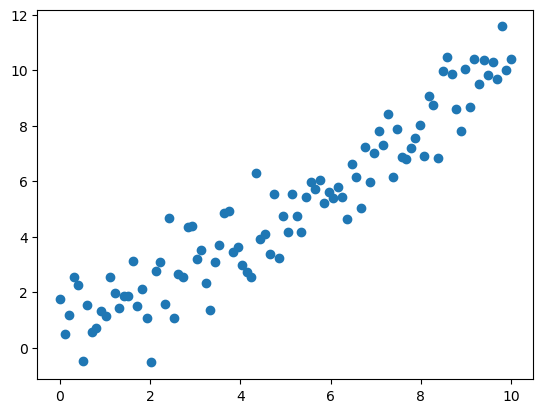

In [58]:
fig, ax = plt.subplots()
_ = ax.scatter(X, y)

On va utiliser un modèle de régression linéaire. Donc faut importer le bon module.


In [37]:
from sklearn.linear_model import LinearRegression

In [64]:
# 2 - Modèle
model = LinearRegression() # pas de paramètres, moindre carré, lire la doc

# Voir
# from sklearn.linear_model import SGDRegressor 
# model = SGDRegressor(max_iter=1000, eta0=0.001)

# 3 - Entrainement
model.fit(X, y)            # https://scikit-learn.org/stable/modules/linear_model.html
model.score(X, y)

0.8881140743377214

Ici le 88% c'est en fait le coef de détermination ($R^2$)

Le $R^2$ de la méthode des moindres carrés.

In [65]:
# 4 - Prédiction
model.predict(X)

array([[0.20847145],
       [0.30647825],
       [0.40448505],
       [0.50249185],
       [0.60049865],
       [0.69850544],
       [0.79651224],
       [0.89451904],
       [0.99252584],
       [1.09053264],
       [1.18853944],
       [1.28654624],
       [1.38455304],
       [1.48255984],
       [1.58056664],
       [1.67857344],
       [1.77658024],
       [1.87458704],
       [1.97259384],
       [2.07060064],
       [2.16860743],
       [2.26661423],
       [2.36462103],
       [2.46262783],
       [2.56063463],
       [2.65864143],
       [2.75664823],
       [2.85465503],
       [2.95266183],
       [3.05066863],
       [3.14867543],
       [3.24668223],
       [3.34468903],
       [3.44269583],
       [3.54070263],
       [3.63870942],
       [3.73671622],
       [3.83472302],
       [3.93272982],
       [4.03073662],
       [4.12874342],
       [4.22675022],
       [4.32475702],
       [4.42276382],
       [4.52077062],
       [4.61877742],
       [4.71678422],
       [4.814

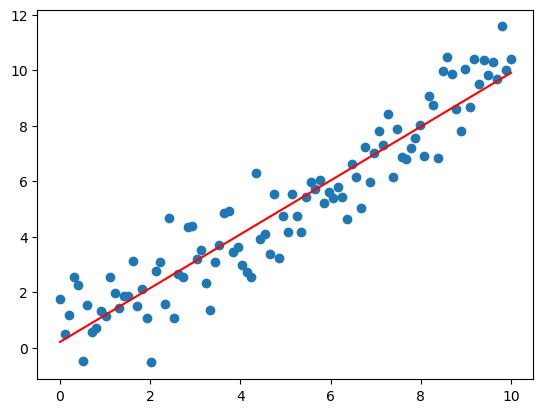

In [66]:
predictions = model.predict(X)

fig, ax = plt.subplots()
_ = ax.scatter(X, y)
_ = ax.plot(X, predictions, c='r')

Si les données d'entrées ne sont plus lineaires ça marche plus.
Faut choisir un autre modèle.

In [67]:
y = X*X + np.random.randn(m, 1)            # 2 dim 

c:\Users\phili\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


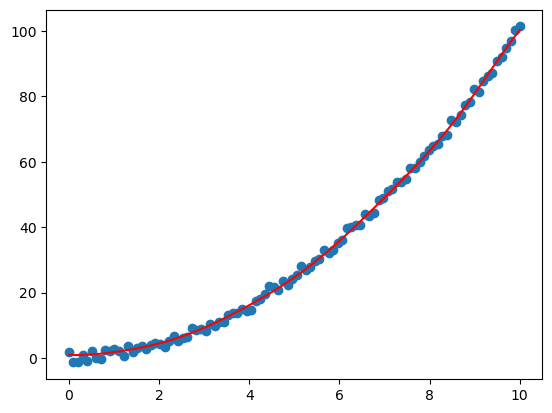

In [69]:
from sklearn.svm import SVR
model = SVR(C=100)                       # support vector machine

model.fit(X, y)       
model.score(X, y)
predictions = model.predict(X)

fig, ax = plt.subplots()
_ = ax.scatter(X, y)
_ = ax.plot(X, predictions, c='r')

## Classification
Classification KNN

In [43]:
import pandas as pd
import seaborn as sns

In [70]:
titanic = sns.load_dataset("titanic")
print(type(titanic))
print(titanic.ndim)
print(titanic.shape)
titanic.head()


<class 'pandas.core.frame.DataFrame'>
2
(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [45]:
titanic = titanic[["survived", "pclass", "sex", "age"]]
titanic.dropna(axis=0, inplace=True)                              # On supprime les lignes
titanic["sex"].replace(["male", "female"], [0,1], inplace=True)
titanic.head()
                  

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


Objectif : développer un modèle de classification pour déterminer qui va survivre ou non.

Utiliser la carte

Choisir KNeighbors Classifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
model = KNeighborsClassifier()

Faut entrainer le modèle sur des données. On a pas de données X et y. On a juste un dataframe Pandas. 

Va falloir diviser le tableau.

In [48]:
y = titanic["survived"]
X = titanic.drop("survived", axis=1) # axis=1 => colonne. On vire la colonne

X et y sont des Dataframes, donc ce sont des tableaux numpy utilisables avec sklearn.

In [49]:
print(X.shape)
print(X.head())

print(y.shape)
print(y.head())

(714, 3)
   pclass  sex   age
0       3    0  22.0
1       1    1  38.0
2       3    1  26.0
3       1    1  35.0
4       3    0  35.0
(714,)
0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


In [50]:
model.fit(X, y)
model.score(X, y)

0.8417366946778712

In [51]:
model.predict(X) # on passe au modèle les passagers qu'il a utilisé pour paramétrer le modèle
                 # 1 = survécu
                 # 0 = mort

array([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,

In [52]:
def survie(model, pclass=3, sex=0, age=26):
  x  = np.array([pclass, sex, age]).reshape(1, 3) # ATTENTION l'ordre est important 
                                                  # Il faut vérifier les dimension des matrices
  print(model.predict(x))
  print(model.predict_proba(x)) # affiche la proba d'appartenir à la classe de ceux qui vont mourrir
                                # et la proba d'appartenir à la classe de ceux qui vont survivre
                                # permet de comprendre la décision

In [53]:
survie(model)
survie(model, age=59, pclass=2)



[0]
[[0.8 0.2]]
[0]
[[1. 0.]]


c:\Users\phili\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\phili\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\phili\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\phili\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Exo
Ecrire une routine pour choisir le meilleur paramètre à passer à 

Best score = 0.874 for index : 1


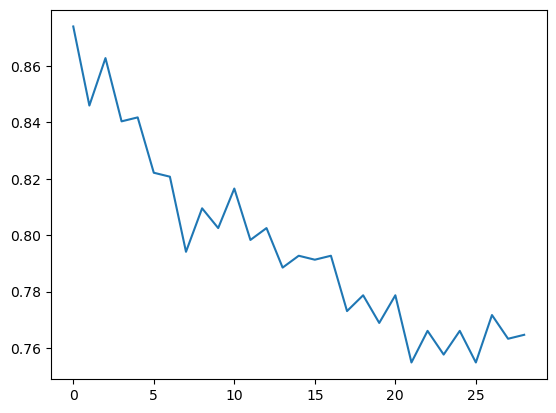

In [54]:
from sklearn.neighbors import KNeighborsClassifier

y = titanic["survived"]
X = titanic.drop("survived", axis=1)

score = []
best_score = 0
for n in range(1, 30):
  model = KNeighborsClassifier(n_neighbors=n)
  model.fit(X, y)
  s = model.score(X, y)
  score.append(s)
  if(best_score<s):
    best_score=s
    best_index=n

print(f"Best score = {best_score:.3f} for index : {best_index}")
fig, ax = plt.subplots()
_ = ax.plot(score)


  